In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
mean1 = np.array([1, 0.5])
cov1 = np.array([[1, 0.1],[0.1, 1.2]])

mean2 = np.array([4, 5])
cov2 = np.array([[1.2, 0.1],[0.1, 1.1]])

dist1 = np.random.multivariate_normal(mean1, cov1, 500)
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

print(dist1.shape)


(500, 2)


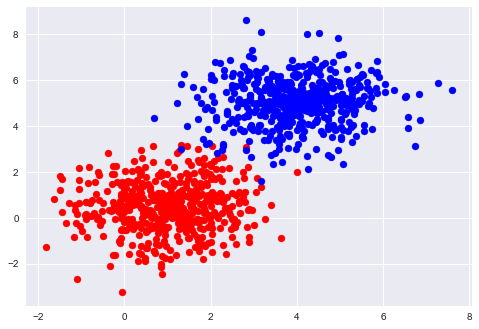

In [3]:
plt.style.use("seaborn")
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='blue')
plt.show()

In [4]:
data = np.zeros((1000, 3))

In [5]:
data[:500, :2] = dist1
data[500:, :2] = dist2

data[500:, -1] = 1.0

In [6]:
np.random.shuffle(data)

In [7]:
data

array([[ 1.27533766, -0.47393743,  0.        ],
       [ 4.30603313,  6.63444127,  1.        ],
       [ 0.93656155,  0.52101355,  0.        ],
       ...,
       [ 4.39803786,  4.63825691,  1.        ],
       [ 2.99078334,  6.95317201,  1.        ],
       [ 3.7219662 ,  4.55769914,  1.        ]])

In [8]:
split = int(0.8*data.shape[0])

X_train = data[:split, :-1]
X_test = data[split:, :-1]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(800, 2) (200, 2) (800,) (200,)


In [9]:
pd.DataFrame(X_test).describe()

,0,1
count,200.000000,200.000000
mean,2.699366,2.988409
std,1.878135,2.533954
min,-1.088309,-2.655242
25%,1.268597,0.729191
50%,2.785337,3.856658
75%,4.211364,5.166193
max,7.596704,6.953172


In [10]:
u = np.mean(X_train)
std = np.std(X_train)

X_train = (X_train-u)/std

In [11]:
X_test = (X_test - u)/std

In [12]:
def sigmoid(x):
  return 1/(1.0 + np.exp(-x))

def hypothesis(X, theta):
  return sigmoid(np.dot(X, theta))

def gradient(X, y, theta):
  y_ = hypothesis(X, theta)
  m = X.shape[0]
  return -1 * (np.dot(X.T, y - y_))/m

def error(X, y, theta):
  y_ = hypothesis(X, theta)
  m = X.shape[0]
  return -1*(np.sum(y*np.log(y_) + (1-y)*np.log(1-y_)))/m

def gradientDescent(X, y, learning_rate = 0.5, max_itrs = 500):
  n = X.shape[1]
  theta = np.zeros((n, 1))
  error_list = []

  for i in range(max_itrs):
    e = error(X, y, theta)
    error_list.append(e)

    grad = gradient(X, y, theta)

    theta = theta - learning_rate * grad

  return theta, error_list
  

In [13]:
ones = np.ones((X_train.shape[0], 1))
X_new_train = np.hstack((ones, X_train))

In [22]:
X_new_train.shape
Y_train = Y_train.reshape((-1, 1))

In [23]:
Y_train.shape

(800, 1)

In [24]:
theta, error_list = gradientDescent(X_new_train, Y_train)

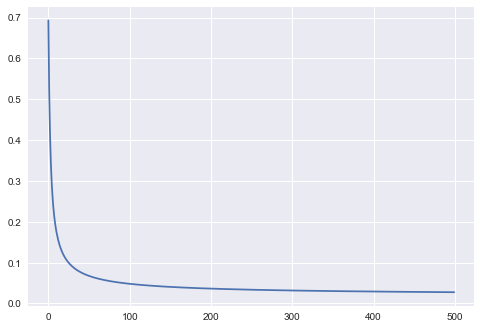

In [25]:
plt.plot(error_list)
plt.show()

In [26]:
theta

array([[-0.16611168],
       [ 3.07668653],
       [ 4.50858289]])

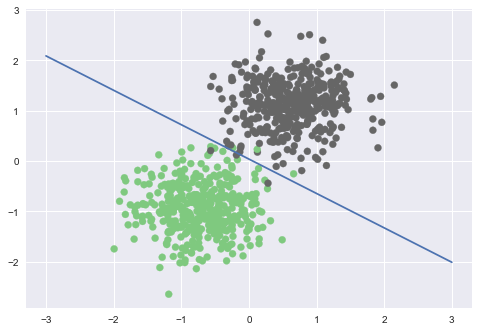

In [29]:
x1 = np.arange(-3, 4)
x2 = -1*(theta[0] + theta[1]*x1)/theta[2]

plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train.reshape((-1,)), cmap=plt.cm.Accent)
plt.plot(x1, x2)

In [36]:
def predict(X, theta):
  y_ = hypothesis(X, theta)

  output = np.zeros(y_.shape)
  output[y_ >= 0.5] = 1
  output = output.astype("int")
  print(output)

In [37]:
predict(X_new_train, theta)

[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]


In [39]:
import keras

ModuleNotFoundError: No module named 'tensorflow'

In [42]:
import keras.datasets